# Cryptocurrency Technical Analysis
This notebook demonstrates fetching crypto data and calculating technical indicators.

In [1]:
import matplotlib.pyplot as plt
from qfin import fetch_crypto_data, calculate_sma, calculate_ema, calculate_rsi
import warnings
warnings.filterwarnings("ignore")

## 1. Fetching Bitcoin (BTC) Data

In [2]:
btc_data = fetch_crypto_data("BTC-USD", period="1y", interval="1d")
btc_data.tail()

Fetching data for BTC-USD...


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2026-02-19,66957.523438,67277.125000,65637.429688,66425.625000,31492987019
2026-02-20,68005.421875,68269.031250,66452.484375,66958.578125,47507867304
2026-02-21,68003.765625,68657.703125,67533.070312,68000.250000,18357635642
2026-02-22,67659.390625,68235.226562,67185.601562,67998.828125,17893536012
2026-02-23,65621.671875,67621.171875,64416.820312,67616.539062,40680312832


## 2. Calculating Technical Indicators
We calculate the 50-day and 200-day Simple Moving Average (SMA), plus the 14-day RSI.

In [3]:
btc_data["SMA_50"] = calculate_sma(btc_data, window=50)
btc_data["SMA_200"] = calculate_sma(btc_data, window=200)
btc_data["RSI_14"] = calculate_rsi(btc_data, window=14)
btc_data.tail()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,RSI_14
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,
2026-02-19,66957.523438,67277.125000,65637.429688,66425.625000,31492987019,82615.231016,99636.478418,59.813005
2026-02-20,68005.421875,68269.031250,66452.484375,66958.578125,47507867304,82200.699766,99401.146113,41.429937
2026-02-21,68003.765625,68657.703125,67533.070312,68000.250000,18357635642,81761.881172,99170.457715,45.302597
2026-02-22,67659.390625,68235.226562,67185.601562,67998.828125,17893536012,81303.005234,98933.614668,39.954006
2026-02-23,65621.671875,67621.171875,64416.820312,67616.539062,40680312832,80787.168828,98674.238535,34.862505


## 3. Visualization and Analysis
Plot the price with moving averages, and plot the RSI below it.

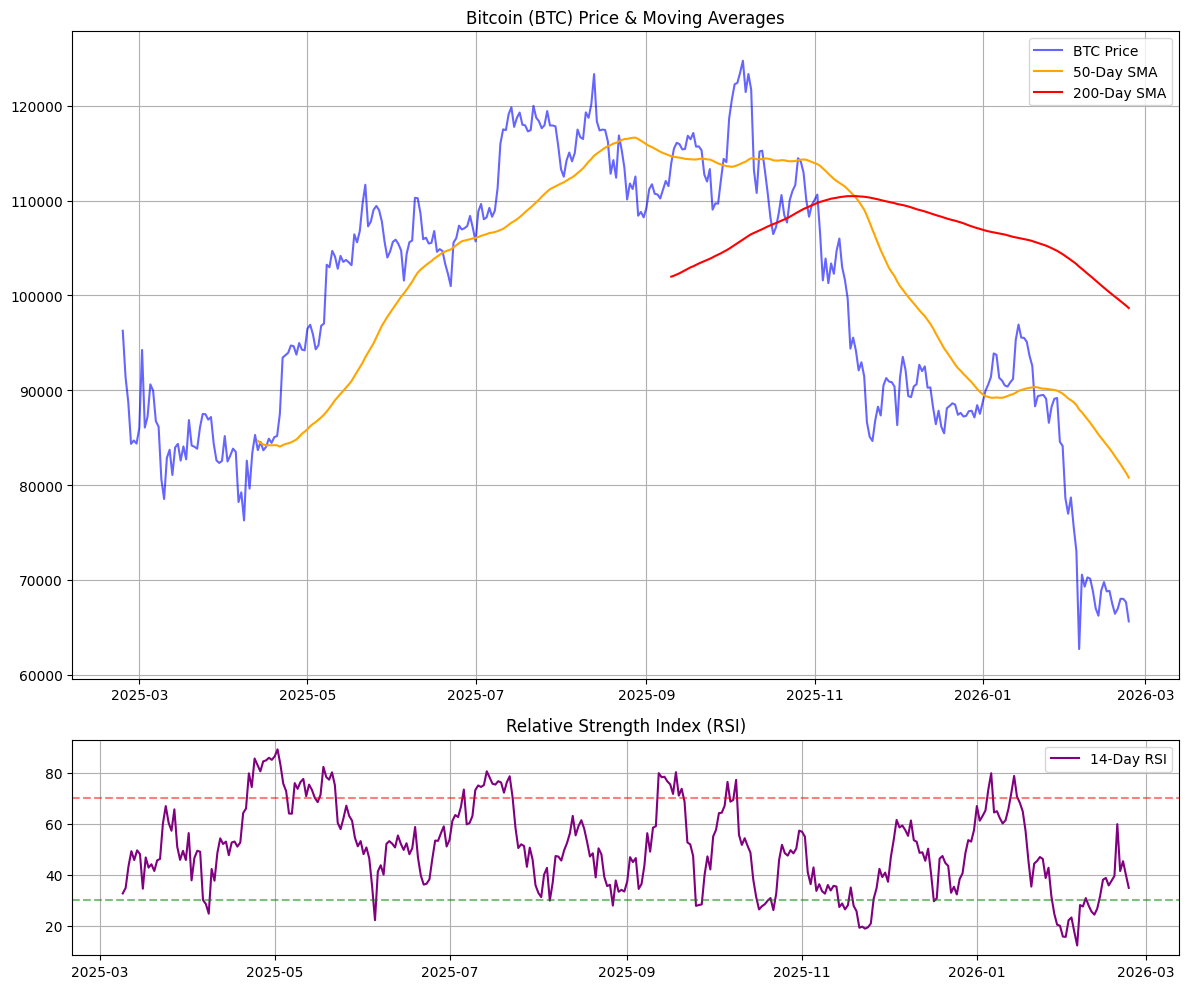

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={"height_ratios": [3, 1]})

# Price and SMAs
ax1.plot(btc_data.index, btc_data["Close"], label="BTC Price", color="blue", alpha=0.6)
ax1.plot(btc_data.index, btc_data["SMA_50"], label="50-Day SMA", color="orange")
ax1.plot(btc_data.index, btc_data["SMA_200"], label="200-Day SMA", color="red")
ax1.set_title("Bitcoin (BTC) Price & Moving Averages")
ax1.legend()
ax1.grid(True)

# RSI
ax2.plot(btc_data.index, btc_data["RSI_14"], label="14-Day RSI", color="purple")
ax2.axhline(70, linestyle="--", color="red", alpha=0.5) # Overbought
ax2.axhline(30, linestyle="--", color="green", alpha=0.5) # Oversold
ax2.set_title("Relative Strength Index (RSI)")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Summary
- **Moving Averages (SMA)**: A "golden cross" (50-day crossing above 200-day) is generally considered bullish, while a "death cross" (50-day crossing below 200-day) is bearish.
- **Relative Strength Index (RSI)**: An RSI above 70 suggests the asset may be overbought, while an RSI below 30 suggests it may be oversold.